In [6]:
import pandas as pd
vgsales_df = pd.read_csv(r"C:\Users\princ\Downloads\vgsales.csv", encoding='utf-8')
# Display the first few rows and the data types

vgsales_head = vgsales_df.head()




In [3]:
vgsales_info = vgsales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [10]:
# Check for missing values and duplicates
missing_values = vgsales_df.isnull().sum()
duplicates = vgsales_df.duplicated().sum()

missing_values, duplicates

(Rank              0
 Name              0
 Platform          0
 Year            271
 Genre             0
 Publisher        58
 NA_Sales          0
 EU_Sales          0
 JP_Sales          0
 Other_Sales       0
 Global_Sales      0
 dtype: int64,
 0)

In [19]:
# Fill missing values
median_year = vgsales_df['Year'].median()
vgsales_df.loc[:, 'Year'] = vgsales_df['Year'].fillna(median_year)
vgsales_df.loc[:, 'Publisher'] = vgsales_df['Publisher'].fillna('Unknown')


# Check for missing values again
missing_values_after = vgsales_df.isnull().sum()
missing_values_after

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [12]:
# Generate descriptive statistics for the dataset
stats = vgsales_df.describe()
stats

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.416134,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.781686,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


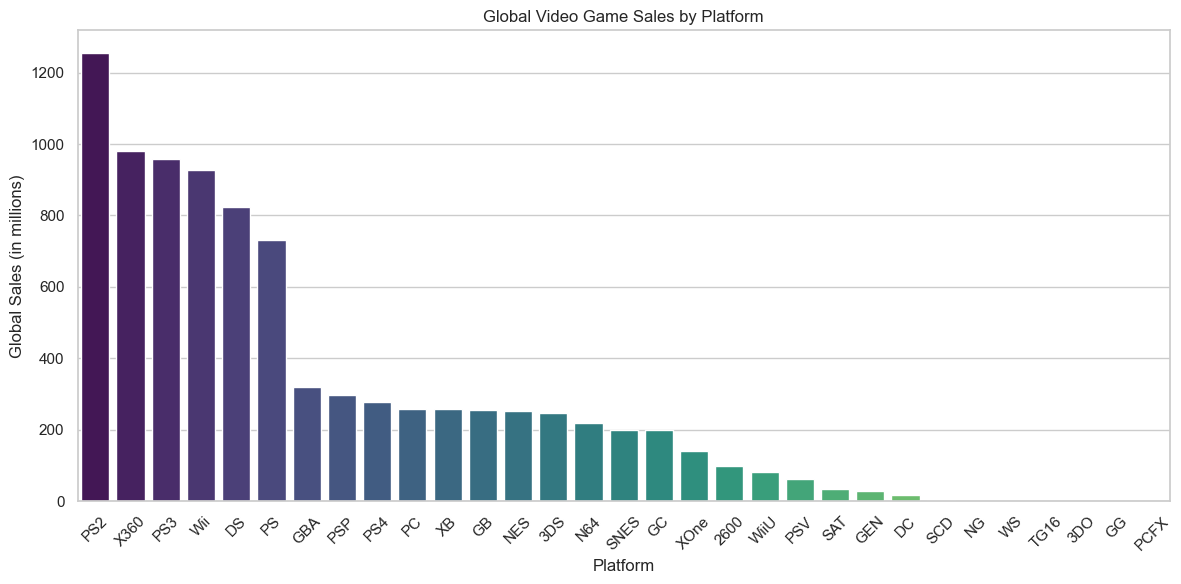

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style='whitegrid')

# Summarize sales by platform
platform_sales = vgsales_df.groupby('Platform')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].sum().reset_index()

# Sort by Global Sales
platform_sales = platform_sales.sort_values(by='Global_Sales', ascending=False)

# Create a bar plot for sales by platform
plt.figure(figsize=(12, 6))
# Assuming platform_sales is your DataFrame
sns.barplot(data=platform_sales, x='Platform', y='Global_Sales', hue='Platform', palette='viridis', legend=False)
plt.title('Global Video Game Sales by Platform')
plt.xlabel('Platform')
plt.ylabel('Global Sales (in millions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

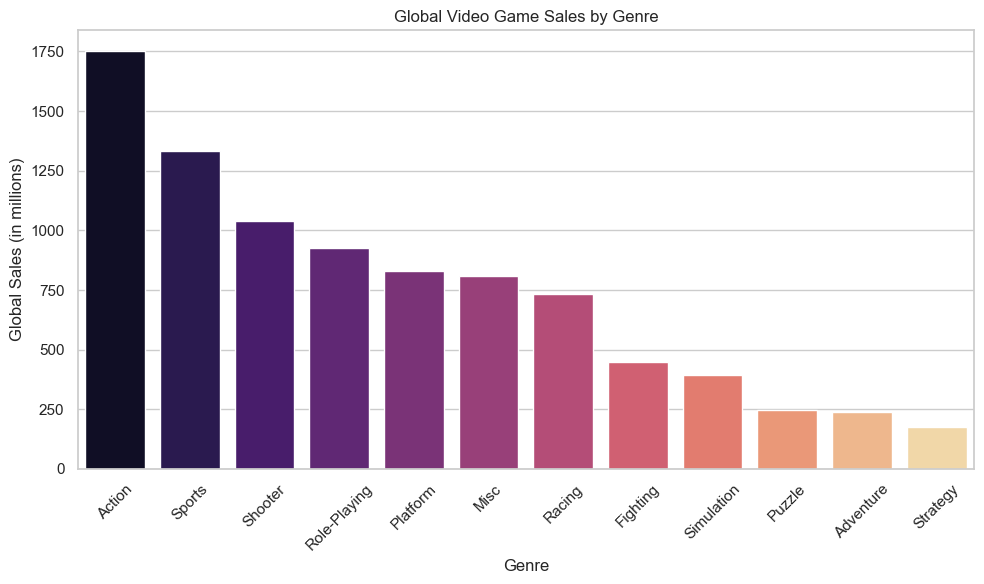

In [22]:
# Summarize sales by genre
genre_sales = vgsales_df.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].sum().reset_index()

# Sort by Global Sales
genre_sales = genre_sales.sort_values(by='Global_Sales', ascending=False)

# Create a bar plot for sales by genre
plt.figure(figsize=(10, 6))
# Assuming genre_sales is your DataFrame
sns.barplot(data=genre_sales, x='Genre', y='Global_Sales', hue='Genre', palette='magma', legend=False)
plt.title('Global Video Game Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Global Sales (in millions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


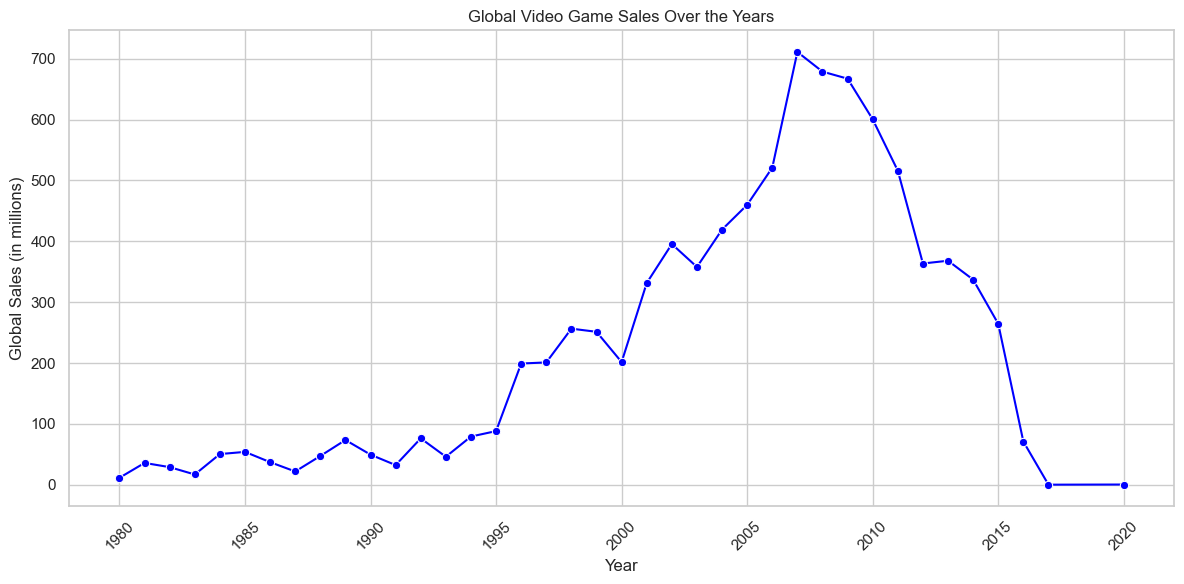

In [15]:
# Summarize global sales by year
yearly_sales = vgsales_df.groupby('Year')['Global_Sales'].sum().reset_index()

# Create a line plot for global sales over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_sales, x='Year', y='Global_Sales', marker='o', color='blue')
plt.title('Global Video Game Sales Over the Years')
plt.xlabel('Year')
plt.ylabel('Global Sales (in millions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

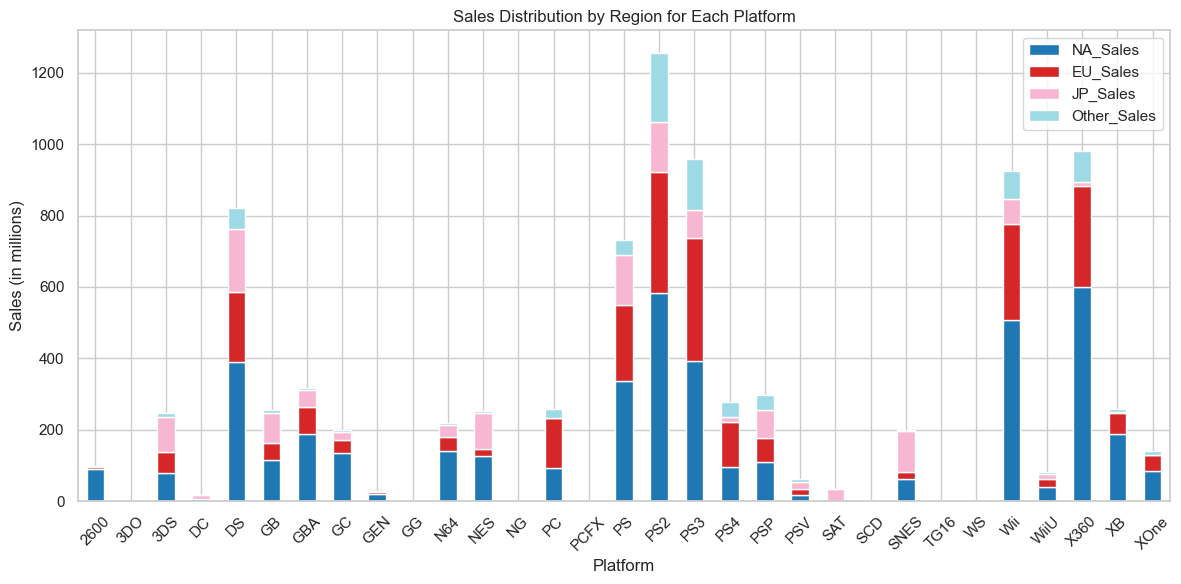

In [16]:
# Summarize sales by platform and region
region_sales = vgsales_df.groupby('Platform')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().reset_index()

# Set the index to Platform for stacking
region_sales.set_index('Platform', inplace=True)

# Create a stacked bar plot for sales by region
region_sales.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')
plt.title('Sales Distribution by Region for Each Platform')
plt.xlabel('Platform')
plt.ylabel('Sales (in millions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

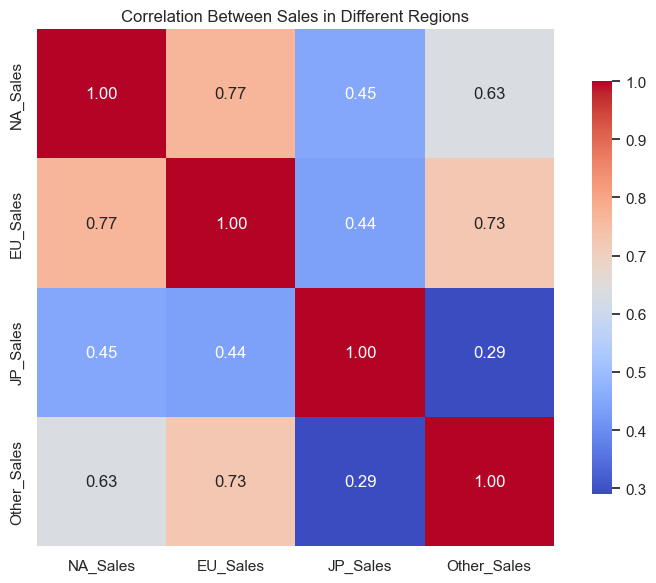

In [17]:
# Calculate the correlation matrix for regional sales
correlation_matrix = vgsales_df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar_kws={'shrink': .8})
plt.title('Correlation Between Sales in Different Regions')
plt.tight_layout()
plt.show()